## **Лабораторна робота №2**

##### Виконав студент групи МІТ-31 __Черевач Юрій__

**Частина 1:** __Регресія на згенерованому наборі даних__
1. Згенеруйте набір даних для регресії за допомогою sklearn.datasets.make_regression (використати не менше 5 параметрів). Набір даних повинен містити не менше 1000 екземплярів.
2. Розділіть дані на навчальний та тестовий набори у співвідношенні 80% - 20%.
3. Побудуйте модель регресії на навчальних даних та оцініть її точність на тестових даних. Використовуйте будь-який регресійний алгоритм за вибором (наприклад, лінійна регресія, дерево рішень, Random Forest тощо).

          0         1         2         3         4         5           6
0 -0.629594 -1.794478  1.016814  1.613159  0.025135  1.051328   30.690341
1  0.502122  0.952936 -0.740108  1.797026  0.769731 -0.263080  143.625153
2  1.982747 -0.436080 -1.977659  1.526481  1.975905 -0.576881  129.955936
3 -0.143105 -2.466285  2.006175 -0.041789 -1.064135  0.532079 -142.011463
4 -0.154881 -2.047035 -1.303154  0.604757 -1.357833  0.515493 -212.588881
                 0            1            2            3            4  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     -0.024879    -0.001635    -0.032123    -0.027128    -0.044706   
std       0.993813     0.992773     0.996970     1.018674     0.981782   
min      -3.217296    -3.987471    -3.172667    -3.341107    -3.440041   
25%      -0.708899    -0.645408    -0.739951    -0.714201    -0.687024   
50%      -0.030640    -0.019407    -0.008074    -0.018567    -0.058749   
75%       0.645431     0.686179     0.

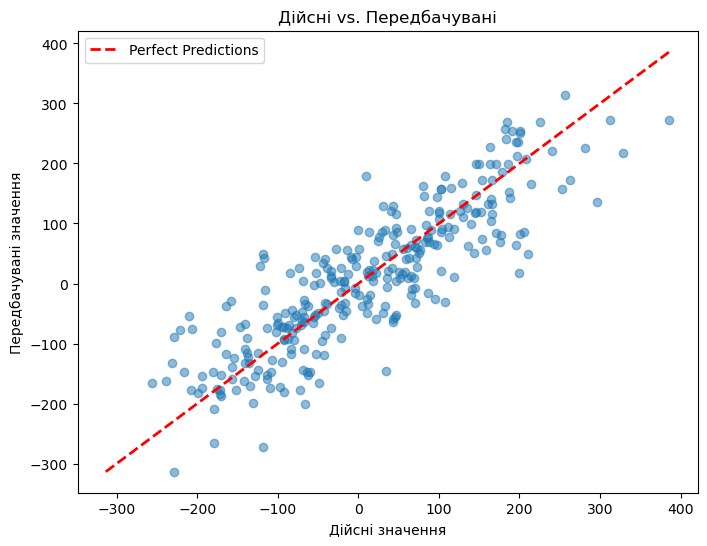

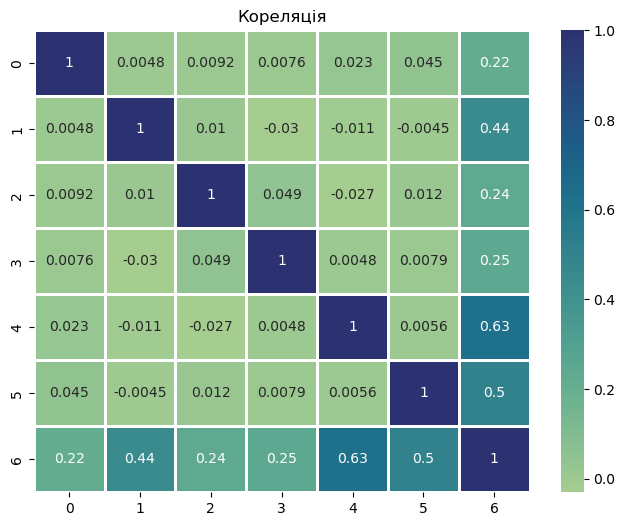

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


#генеруємо набір даних для регресії
X, y = make_regression(n_samples=1500, n_features=6, bias=2.4, noise=2)
"""
Х - (input samples) генерація вхідних даних для моделі
у - (outрut values) вихідні значення, передбачені на основі згенерованих вхідних даних (Х)
n_samples - кількість вхідних значень
n_features - кількість ознак (колонок)
bias - зсув вихідних значень
noise - шум
"""
#формування таблиці з даними
df = pd.DataFrame(X)
df[6] = y  #шостий рядок датасету -- для значень
df.to_csv("data_part1.csv", index=False) #зберігаю 

data = pd.read_csv('data_part1.csv') # читаю збережений датасет

print(data.head())
print(data.describe()) #опис датасету

#розділяємо дані на тестовий та навчальний набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

#cтворюємо модель
model = DecisionTreeRegressor() #дерево рішень - контрольований метод навчання
model.fit(X_train, y_train) #треную модель на даних

y_pred = model.predict(X_test) #генерація значень (передбачуваних)

#обрахування похибок
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {r2}")

#візуалізовую дані
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Дійсні значення")
plt.ylabel("Передбачувані значення")
plt.title("Дійсні vs. Передбачувані")

#обраховую максимальні і мінімальні значення для виведення на графік лінії
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', linewidth=2, label="Perfect Predictions")
plt.legend()
plt.show()

#Матриця кореляції
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, linewidth=2, cmap='crest')
plt.title('Кореляція')
plt.show()